In [1]:
import tensorflow as tf 
import model
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread,imresize,imsave
import os

C:\Users\resu\Desktop\pythonIDE\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pic_test=imread('original.jpg')
h,w,n=pic_test.shape
pic_test_low=imresize(pic_test,(int(h/3),int(w/3)))
pic_test_low=imresize(pic_test_low,(h,w))
imsave('pic_low.jpg',pic_test_low)

C:\Users\resu\Desktop\pythonIDE\anaconda\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
C:\Users\resu\Desktop\pythonIDE\anaconda\lib\site-packages\scipy\misc\pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


In [3]:
model_save_path=".//path//model//"
model_name="model.ckpt"
im_size_low=model.im_size+model.f1+model.f2+model.f3-3
pic_test_low=pic_test_low.reshape(1,h,w,n)
x=tf.placeholder(tf.float32,
                     [None,
                      h,
                      w,
                      n],
                     name='x-input')
y=tf.placeholder(tf.float32,
                     [None,
                      model.im_size,
                      model.im_size,
                      model.n],
                     name='y-output')
y_hat=model.inference(x)

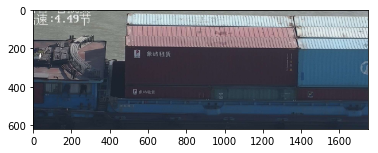

In [4]:
a=pic_test_low[0,:,:,:]
a=a.reshape(h,w,n)
plt.imshow(a)
plt.show()

In [13]:
saver=tf.train.Saver()
with tf.Session() as sess:
    ckpt=tf.train.get_checkpoint_state(model_save_path)
    if ckpt and ckpt.model_checkpoint_path:
        saver.restore(sess,ckpt.model_checkpoint_path)
        global_step=ckpt.model_checkpoint_path.split('/')[-1].split('/')[-1]
        y_value=sess.run(y_hat,feed_dict={x:pic_test_low})
        z=y_value.reshape(y_value.shape[1],y_value.shape[2],y_value.shape[3])
        imsave('new_pic100w.jpg',z)

INFO:tensorflow:Restoring parameters from ./path/model/model.ckpt-400001


In [2]:
a=np.load('image_high1.npy')

In [3]:
a.shape

(50000, 33, 33, 3)

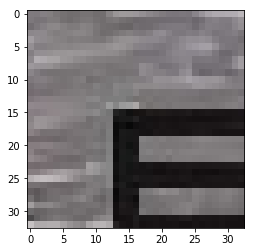

In [8]:
b=a[1,:,:,:]
b.reshape(33,33,3)
plt.imshow(b)
plt.show()

In [11]:
data1=os.listdir('database')
data1[0]

'万宁货666_413852689_0.jpg'